# Prediksi Penyewa Sepeda Dengan Metode Random Forest

## Business Understanding

### Latar Belakang  




Seoul Bike Sharing System (Ddareungi) adalah layanan berbagi sepeda yang digunakan oleh penduduk lokal dan wisatawan di Seoul. Dalam upaya mengoptimalkan layanan, penting untuk memahami pola permintaan sepeda berdasarkan berbagai faktor seperti waktu, cuaca, dan hari libur. Informasi ini dapat membantu meningkatkan efisiensi operasional, seperti distribusi sepeda di stasiun dan perencanaan kapasitas layanan.


### Tujuan Proyek

Tujuan:  
1. Meningkatkan prediksi permintaan sepeda untuk mengoptimalkan alokasi sepeda di stasiun.  
2. Meminimalkan waktu pelanggan menunggu sepeda atau stasiun untuk mengembalikan sepeda.  
3. Mengidentifikasi pola penggunaan sepeda berdasarkan musim, cuaca, dan waktu.

Masalah Bisnis:  
1. Kekurangan sepeda di stasiun tertentu selama waktu sibuk dan kelebihan di stasiun lain.  
2. Kesulitan dalam memperkirakan permintaan sepeda pada waktu tertentu berdasarkan kondisi eksternal.  
3. Pengelolaan distribusi sepeda yang tidak efisien dapat meningkatkan biaya operasional.

### Manfaat Proyek

1. Pemerintah Kota dan Operator Layanan:  
- Optimalisasi Alokasi Sepeda: Prediksi permintaan yang akurat membantu dalam distribusi sepeda yang lebih efisien di seluruh stasiun.  
- Pengurangan Biaya Operasional: Dengan memahami pola penggunaan, operator dapat mengurangi biaya logistik seperti transportasi sepeda antar stasiun.  
- Perencanaan Infrastruktur: Informasi permintaan jangka panjang dapat digunakan untuk menambah atau mengurangi jumlah stasiun sepeda di lokasi tertentu.  
2. Pengguna Layanan:  
- Ketersediaan Sepeda: Pengguna dapat mengakses sepeda kapan saja tanpa harus menunggu atau mencari di stasiun lain.  
- Pengalaman Pengguna yang Lebih Baik: Pengurangan waktu tunggu dan kepastian ketersediaan sepeda meningkatkan kepuasan pengguna.  
3. Masyarakat Secara Umum:  
- Pengurangan Polusi: Layanan sepeda yang lebih efisien dapat mendorong lebih banyak orang untuk menggunakan transportasi ramah lingkungan.  
- Kesehatan dan Kebugaran: Penggunaan sepeda yang lebih banyak dapat berkontribusi pada gaya hidup sehat.  
4. Peneliti dan Data Scientist:  
- Studi Lebih Lanjut: Dataset dan model ini dapat menjadi dasar untuk penelitian lebih lanjut tentang transportasi berbagi sepeda di kota lain.  
- Pengembangan Model Lain: Model prediksi dapat diterapkan pada layanan transportasi lain seperti berbagi skuter atau kendaraan listrik.

### KPI (Key Performance Indicators)

Akurasi Model  

Mean Absolute Percentage Error (MAPE): Metrik untuk mengukur persentase kesalahan rata-rata prediksi.  
Target: < 20% untuk hasil yang sangat baik.  
Root Mean Squared Error (RMSE): Mengukur kesalahan prediksi dalam satuan yang sama dengan target.  
Target: Serendah mungkin.

## Data Understanding

### Deskripsi Dataset

Dataset didapatkan dari sumber  
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

Deskripsi Dataset  
Dataset Seoul Bike Sharing Demand Prediction berisi informasi tentang jumlah sepeda yang disewa setiap jam di Seoul, serta faktor eksternal yang mungkin memengaruhi permintaan.

Fitur-Fitur dalam Dataset  
Date: Tanggal penyewaan (format YYYY-MM-DD).  
Rented_Bike_Count: Jumlah sepeda yang disewa per jam (target variabel).  
Hour: Jam dalam format 24 jam (0–23).  
Temperature(°C): Suhu rata-rata per jam dalam derajat Celsius.  
Humidity(%): Kelembapan rata-rata per jam dalam persen.  
Wind_speed(m/s): Kecepatan angin rata-rata per jam dalam meter per detik.  
Visibility(10m): Jarak pandang rata-rata per jam dalam satuan 10 meter.  
Dew_point_temperature(°C): Suhu titik embun rata-rata per jam dalam derajat Celsius.  
Solar_Radiation(MJ/m2): Intensitas radiasi matahari rata-rata per jam dalam MJ/m².  
Rainfall(mm): Curah hujan rata-rata per jam dalam milimeter.  
Snowfall(cm): Tingkat salju rata-rata per jam dalam sentimeter.  
Seasons: Musim (0 = Spring, 1 = Summer, 2 = Fall, 3 = Winter).  
Holiday: Apakah hari tersebut adalah hari libur (Yes = 1, No = 0).  
Functioning_Day: Apakah hari tersebut operasional (Yes = 1, No = 0).

## Data Preparation

### Import Library

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from scipy.stats import zscore

### Load Data

In [16]:
# Load data dengan encoding 'ISO-8859-1'
data = pd.read_csv('SeoulBikeData1.csv', encoding='ISO-8859-1')

# Konversi kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Visualisasi Data

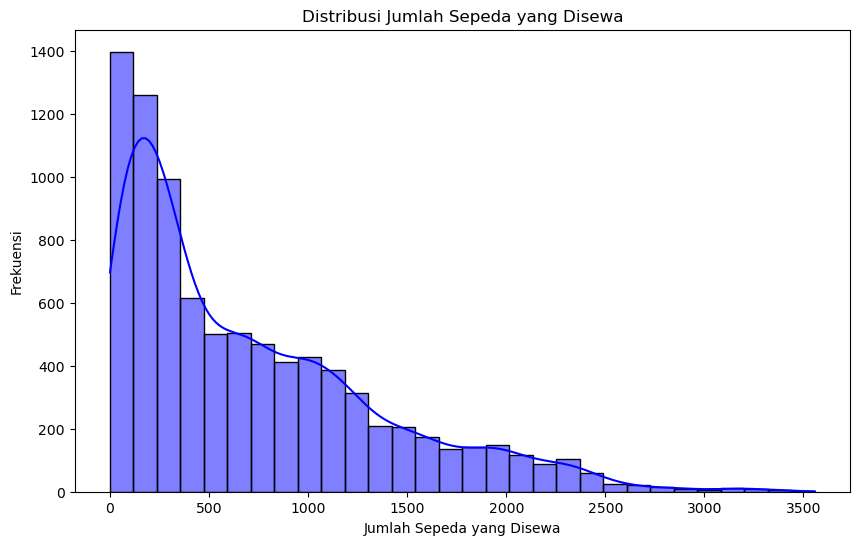

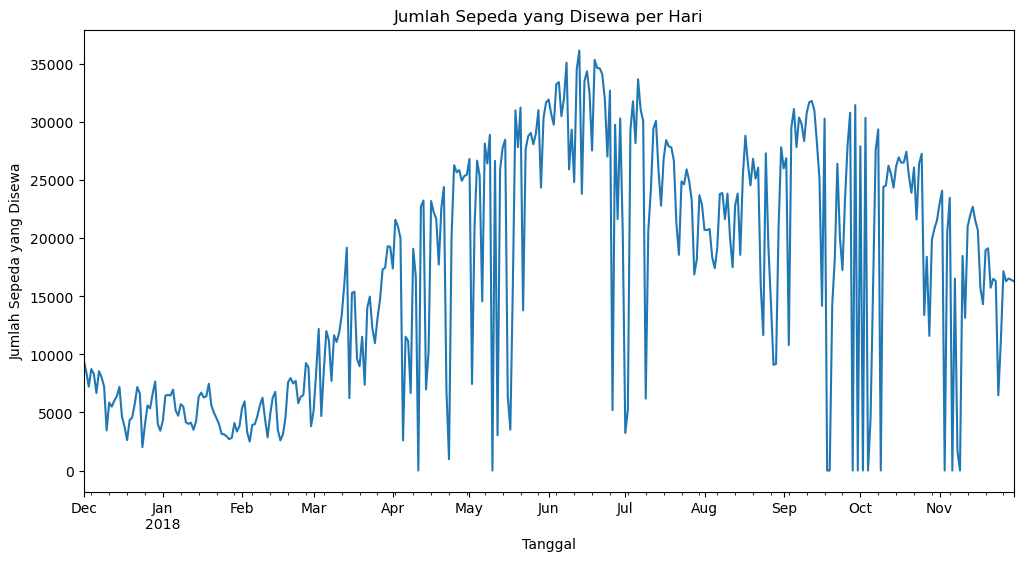

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram jumlah sepeda yang disewa
plt.figure(figsize=(10, 6))
sns.histplot(data['Rented_Bike_Count'], kde=True, color='blue', bins=30)
plt.title('Distribusi Jumlah Sepeda yang Disewa')
plt.xlabel('Jumlah Sepeda yang Disewa')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi trend jumlah sepeda yang disewa per hari
data.groupby('Date')['Rented_Bike_Count'].sum().plot(figsize=(12, 6))
plt.title('Jumlah Sepeda yang Disewa per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda yang Disewa')
plt.show()

## Data Preprocessing


### Encode Data Kategori

In [18]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Melakukan encoding untuk kolom kategorikal
data['Seasons'] = le.fit_transform(data['Seasons'])
data['Holiday'] = le.fit_transform(data['Holiday'])
data['Functioning_Day'] = le.fit_transform(data['Functioning_Day'])
data.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


mengubah data pada kolom season, holiday, functioning day dari kategori menjadi numerik

In [4]:
# Urutkan data berdasarkan 'Date' dan 'Hour' untuk memastikan urutan yang benar
data = data.sort_values(by=['Date', 'Hour'])

### Normalisasi

In [5]:
# Standarisasi data numerik
scaler = StandardScaler()
numeric_features = ['Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 
                    'Dew_point_temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 
                    'Snowfall(cm)']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

### Memisahkan Fitur dan Target

In [6]:
# Fitur dan target
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 
            'Dew_point_temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 
            'Snowfall(cm)', 'Seasons', 'Holiday', 'Functioning_Day']

target = 'Rented_Bike_Count'

### Mencari Outlier

In [19]:
# Menghitung Z-Score untuk fitur numerik
z_scores = zscore(data[features])

# Menemukan outlier dengan Z-Score lebih besar dari 3 atau lebih kecil dari -3
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())

Hour                           0
Temperature(°C)                0
Humidity(%)                    0
Wind_speed(m/s)               63
Visibility(10m)                0
Dew_point_temperature(°C)      0
Solar_Radiation(MJ/m2)        85
Rainfall(mm)                  94
Snowfall(cm)                 173
Seasons                        0
Holiday                      432
Functioning_Day              295
dtype: int64


### Mengatasi Outlier

In [8]:
# Mengganti outlier dengan batas bawah atau atas
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data[features] = data[features].apply(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))

## Data Processing

### Sliding Window

In [9]:
# Tentukan panjang jendela (window size)
window_size = 24  # Menggunakan 24 jam sebelumnya sebagai fitur

# Buat kolom untuk sliding window
for i in range(1, window_size + 1):
    data[f'Rented_Bike_Count_lag_{i}'] = data['Rented_Bike_Count'].shift(i)

# Hapus baris dengan nilai NaN akibat sliding window
data = data.dropna()

In [10]:
# Perbarui fitur (X) dan target (y) dengan fitur sliding window
sliding_window_features = [f'Rented_Bike_Count_lag_{i}' for i in range(1, window_size + 1)]
features_extended = features + sliding_window_features

X = data[features_extended]
y = data[target]

In [11]:
# Pastikan data terurut berdasarkan waktu
data = data.sort_values(by=['Date', 'Hour'])

### Split Data

In [12]:
# Tentukan proporsi data latih dan data uji
train_size = int(len(data) * 0.8)

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

data dibagi kedalam data latih 80% dan data uji 20%

### Melatih Model

In [13]:
# Inisialisasi model RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

### Evaluasi Model

In [14]:
# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menghitung MAPE (Mean Absolute Percentage Error) hanya untuk nilai non-nol pada y_test
non_zero_mask = y_test != 0
y_test_non_zero = y_test[non_zero_mask]
y_pred_non_zero = y_pred[non_zero_mask]

mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

RMSE: 144.890651932779
MAPE: 25.538085543114853%


### Visualisasi Hasil

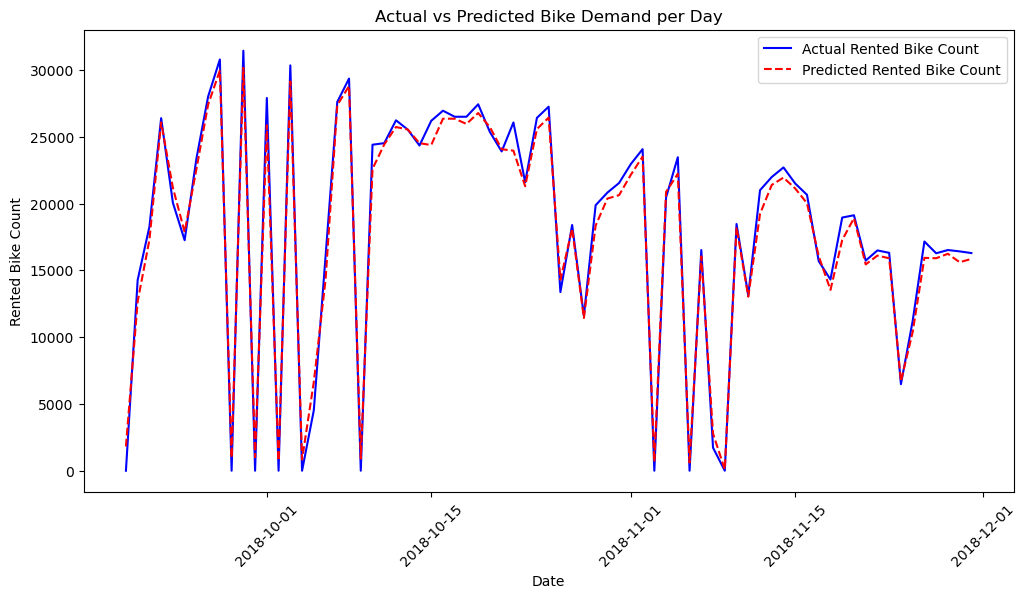

In [32]:
# Ambil tanggal yang sesuai dari data uji
dates = data.loc[y_test.index, 'Date'].reset_index(drop=True)

# Buat DataFrame untuk menampilkan hasil prediksi dan nilai sebenarnya per tanggal
result_df = pd.DataFrame({
    'Date': dates,
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

# Mengelompokkan data berdasarkan tanggal dan menjumlahkan nilai aktual dan prediksi per hari
daily_result = result_df.groupby('Date').sum()

# Plotkan grafik Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(daily_result.index, daily_result['Actual'], label='Actual Rented Bike Count', color='blue')
plt.plot(daily_result.index, daily_result['Predicted'], label='Predicted Rented Bike Count', color='red', linestyle='--')

# Menambahkan label dan judul
plt.title('Actual vs Predicted Bike Demand per Day')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')

# Menampilkan legenda
plt.legend()

# Rotasi tanggal agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan grafik
plt.show()